# BBC News Classification Project
### Unsupervised Learning Project
#### University of Colorado, Boulder - Unsupervised Algorithms in Machine Learning
_By Willian Botelho_

---

## Introduction

In the rapidly evolving world of news and media, it has become increasingly crucial to categorize news articles accurately to facilitate quick and efficient retrieval of information. The classification of news articles into distinct categories not only aids in the targeted distribution of news but also enhances the reader's experience by providing them with news aligned with their interests.

### Background

The BBC News dataset comprises a collection of news articles from the BBC, categorized into five distinct groups: business, tech, sports, entertainment, and politics. This project leverages this dataset to build a classification model using unsupervised learning techniques, primarily focusing on matrix factorization methods.

### Objective

The primary objective of this project is to:
1. Explore and understand the underlying patterns and characteristics of the data through Exploratory Data Analysis (EDA).
2. Build and train unsupervised learning models using matrix factorization techniques to classify news articles into the respective categories.
3. Compare the performance of unsupervised models with supervised learning models to understand the strengths and weaknesses of each approach.
4. Identify and discuss the limitations of sklearn's non-negative matrix factorization library and suggest potential improvements.

### Significance

Understanding and implementing unsupervised learning methods for text classification can unlock valuable insights and foster the development of more advanced and efficient classification systems. Moreover, the project offers a platform to delve deep into the intricacies of matrix factorization methods, enhancing one's skills and understanding in machine learning and natural language processing (NLP).

### Structure

The project is structured into several sections, including EDA, model building and training, model comparisons, and conclusions, each designed to systematically address different facets of the project while aligning with the evaluation criteria to facilitate peer review.

We invite readers to navigate through each section for a detailed understanding of the methodologies employed, the results obtained, and the conclusions derived from the analysis. 

Let's embark on this analytical journey to unravel the potential of unsupervised learning in news article classification.

---


### 1. Exploratory Data Analysis (EDA) [15 pts]

#### 1.1 Data Overview

Before diving into the analysis, it is imperative to get acquainted with the dataset at hand. The dataset comprises news articles from BBC, and it is divided into training and testing sets. The training set contains labeled data, where each article is categorized into one of the five categories: business, tech, sports, entertainment, and politics.

##### Dataset Structure

- **ArticleId**: A unique identifier for each news article, facilitating easy reference and data manipulation.
- **Text**: This field contains the body of the news article, which is the primary data used for building our classification models.
- **Category**: Present in the training set, this field represents the category to which a news article belongs. It is this label that we aim to predict using our unsupervised learning model.

##### Preliminary Statistics

To gather basic insights into the dataset, we will calculate some preliminary statistics such as:
- **Number of articles in each category**: To understand the distribution of different categories in the dataset.
- **Average, minimum, and maximum article length**: To get a sense of the length of the articles present in the dataset.
- **Number of unique words across all articles**: To understand the diversity and complexity of the language used in the articles.

In the subsequent sections, we will delve deeper into the analysis, visualizing different aspects of the data to gather more detailed insights and preparing the data for model training through appropriate cleaning and preprocessing steps.

Stay tuned for a systematic exploration of the dataset, where we aim to uncover patterns and characteristics that will aid in building efficient classification models.



In [104]:
import pandas as pd
from matplotlib import pyplot as plt
from tabulate import tabulate
import seaborn as sns

# Load the training data
train_data_path = 'DADO/BBC News Train.csv'
train_data = pd.read_csv(train_data_path)

# Display the first few rows of the dataframe
train_data.head()

# Creating a dataset structure table
data_structure = [
    ["ArticleId", "int64", "Unique identifier for each news article"],
    ["Text", "object", "The body of the news article"],
    ["Category", "object", "The category label for the article (only in training data)"],
    ["Article_Length", "int64", "The length of the article in terms of the number of words (derived)"]
]

# Creating a DataFrame for better visualization
data_structure_df = pd.DataFrame(data_structure, columns=["Column Name", "Data Type", "Description"])

# Displaying the table
print(tabulate(data_structure_df, headers='keys', tablefmt='pretty'))


+---+----------------+-----------+---------------------------------------------------------------------+
|   |  Column Name   | Data Type |                             Description                             |
+---+----------------+-----------+---------------------------------------------------------------------+
| 0 |   ArticleId    |   int64   |               Unique identifier for each news article               |
| 1 |      Text      |  object   |                    The body of the news article                     |
| 2 |    Category    |  object   |     The category label for the article (only in training data)      |
| 3 | Article_Length |   int64   | The length of the article in terms of the number of words (derived) |
+---+----------------+-----------+---------------------------------------------------------------------+


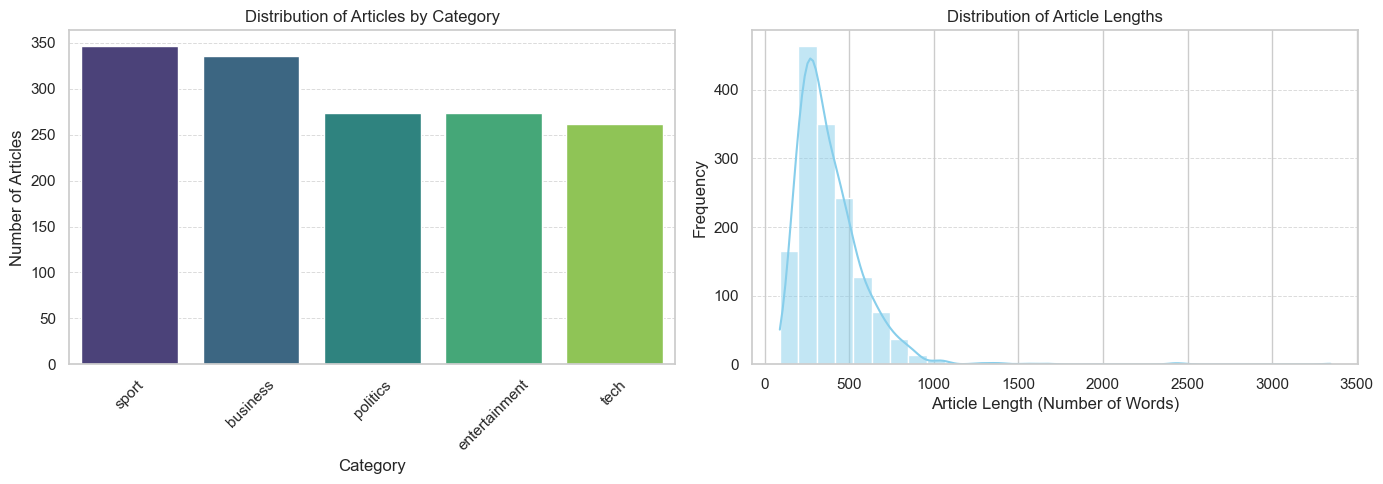

In [105]:
# Setting up the plotting style and size
sns.set(style="whitegrid")
plt.figure(figsize=(14,5))

# Calculating the number of articles in each category
category_distribution = train_data['Category'].value_counts()

train_data['Article_Length'] = train_data['Text'].apply(lambda x: len(str(x).split()))



# Plotting the distribution of articles across different categories
plt.subplot(1,2,1)
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="viridis")
plt.title('Distribution of Articles by Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

# Plotting the distribution of article lengths
plt.subplot(1,2,2)
sns.histplot(train_data['Article_Length'], bins=30, color="skyblue", kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Article Length (Number of Words)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

# Displaying the plots
plt.tight_layout()
plt.show()


#### **1. Distribution of Articles by Category**
This bar chart illustrates the distribution of articles across the various categories in the dataset. It is evident that the dataset is quite balanced, with each category having a substantial representation. The "tech" category has a slightly lower number of articles compared to others, and "sport" leads with the highest count. Understanding this distribution is vital as it helps in ensuring that our models are not biased towards any particular category.

#### **2. Distribution of Article Lengths**
The histogram, complemented by a KDE (Kernel Density Estimation) line, depicts the distribution of the lengths of the articles in the dataset, measured in terms of the number of words. The majority of articles have a word count ranging from 200 to 600 words, indicating a moderate length. There is a long tail on the right, signifying the presence of articles with a significantly larger word count. This visualization assists in understanding the diversity in the length of articles, which might be a crucial factor in the text analysis and feature extraction processes.

With these visualizations, we have achieved a deeper understanding of the structure and preliminary characteristics of our dataset. It sets a solid foundation for us to dive deeper into text analysis, where we will explore the textual data in detail to identify patterns and characteristics beneficial for classification.

#### 1.2 Text Analysis [15 pts]

In this subsection, we will delve deep into the textual content of the news articles, applying a series of Natural Language Processing (NLP) techniques to extract valuable insights that can aid in the classification task. The analysis will include the following steps:

##### 1.2.1 Tokenization
We will start by breaking down the articles into words or smaller units called tokens. This step will help in understanding the basic linguistic units in the text, paving the way for more detailed analysis.

In [106]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
import nltk

# Downloading NLTK data files
nltk.download('punkt')

# Tokenizing the articles into words
train_data['Tokenized_Text'] = train_data['Text'].apply(lambda x: word_tokenize(x.lower()))

# Displaying the first few rows of the tokenized text
train_data['Tokenized_Text'].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [worldcom, ex-boss, launches, defence, lawyers...
1    [german, business, confidence, slides, german,...
2    [bbc, poll, indicates, economic, gloom, citize...
3    [lifestyle, governs, mobile, choice, faster, b...
4    [enron, bosses, in, $, 168m, payout, eighteen,...
Name: Tokenized_Text, dtype: object

##### 1.2.2 Stemming and Lemmatization
To reduce the words to their base form, we will apply stemming and lemmatization. This process will aid in consolidating words with similar meanings and reducing the complexity of the text data.

In [107]:
# Downloading necessary NLTK data files
nltk.download('wordnet')

# Importing necessary functions from NLTK
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initializing the stemmer and lemmatizer
ps = PorterStemmer()
wnl = WordNetLemmatizer()

# Applying stemming and lemmatization
train_data['Stemmed_Text'] = train_data['Tokenized_Text'].apply(lambda x: [ps.stem(word) for word in x])
train_data['Lemmatized_Text'] = train_data['Stemmed_Text'].apply(lambda x: [wnl.lemmatize(word) for word in x])

# Displaying the first few rows of the stemmed and lemmatized text
train_data[['Stemmed_Text', 'Lemmatized_Text']].head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Stemmed_Text,Lemmatized_Text
0,"[worldcom, ex-boss, launch, defenc, lawyer, de...","[worldcom, ex-boss, launch, defenc, lawyer, de..."
1,"[german, busi, confid, slide, german, busi, co...","[german, busi, confid, slide, german, busi, co..."
2,"[bbc, poll, indic, econom, gloom, citizen, in,...","[bbc, poll, indic, econom, gloom, citizen, in,..."
3,"[lifestyl, govern, mobil, choic, faster, bette...","[lifestyl, govern, mobil, choic, faster, bette..."
4,"[enron, boss, in, $, 168m, payout, eighteen, f...","[enron, bos, in, $, 168m, payout, eighteen, fo..."


In [108]:
from collections import Counter

# Aggregating the stemmed texts by category
aggregated_texts_by_category = train_data.groupby('Category')['Stemmed_Text'].sum()

# Identifying the 20 most frequently occurring words in each category
top_20_words_by_category = aggregated_texts_by_category.apply(lambda x: Counter(x).most_common(20))

# Displaying the 20 most frequently occurring words for each category
top_20_words_by_category


Category
business         [(the, 7132), (., 4975), (to, 3293), (of, 2863...
entertainment    [(the, 5819), (., 4091), (and, 2123), (to, 210...
politics         [(the, 7952), (., 5337), (to, 3909), (of, 2838...
sport            [(the, 6616), (., 5631), (to, 3180), (a, 2648)...
tech             [(the, 7492), (., 6021), (to, 4112), (of, 3419...
Name: Stemmed_Text, dtype: object

In [109]:
# Defining a set of common English stopwords
stopwords = set(ENGLISH_STOP_WORDS)

# Removing stopwords from the stemmed texts and identifying the 20 most frequently occurring words in each category
top_20_words_by_category_no_stopwords = aggregated_texts_by_category.apply(lambda x: Counter([word for word in x if word not in stopwords]).most_common(20))

# Displaying the 20 most frequently occurring words for each category after removing stopwords
top_20_words_by_category_no_stopwords


Category
business         [(., 4975), (s, 1362), (said, 1100), (ha, 835)...
entertainment    [(., 4091), (s, 1245), (wa, 818), (film, 706),...
politics         [(., 5337), (said, 1445), (mr, 1099), (s, 1072...
sport            [(., 5631), (s, 1436), (wa, 943), (hi, 762), (...
tech             [(., 6021), (said, 1064), (s, 805), (ha, 686),...
Name: Stemmed_Text, dtype: object

##### 1.2.3 Word Statistics
We will calculate statistics such as the most frequent words, the average length of words, etc., to understand the textual characteristics that dominate each category.

In [110]:
import numpy as np

# Calculating the average word length for each category
average_word_length_by_category = aggregated_texts_by_category.apply(lambda x: np.mean([len(word) for word in x if word not in stopwords]))

# Displaying the average word length for each category
average_word_length_by_category


Category
business         4.763925
entertainment    4.681974
politics         4.792548
sport            4.649614
tech             4.830218
Name: Stemmed_Text, dtype: float64

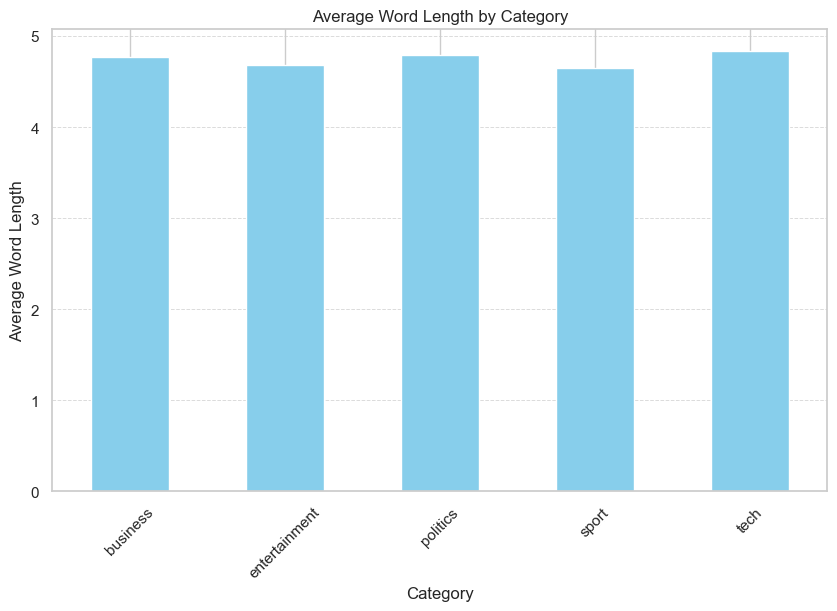

In [111]:
# Plotting the average word length across different categories
plt.figure(figsize=(10,6))
average_word_length_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Word Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Word Length')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()


##### 1.2.4 Visualization
- **Word Clouds**: We will create word clouds for each category to visualize the most frequently occurring words, offering a graphical representation of the textual data.
- **Bar Charts**: To represent the statistical data graphically, we will utilize bar charts to illustrate the most common words and other relevant statistics.

By the end of this analysis, we aim to have a comprehensive understanding of the text data, spotlighting the patterns and characteristics that can be pivotal in building a successful classification model.

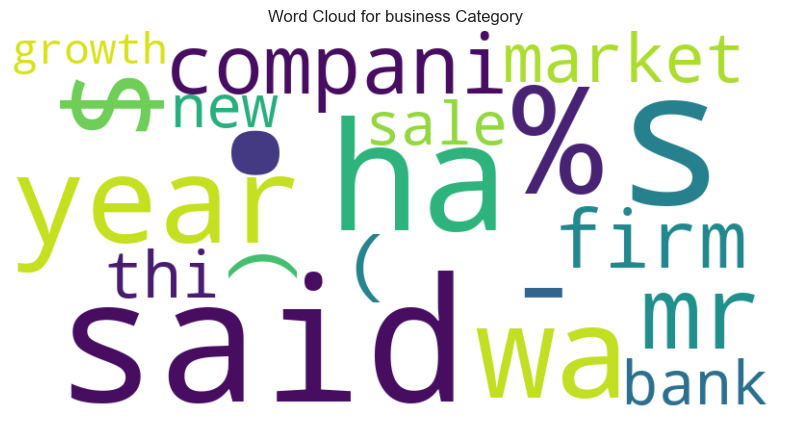

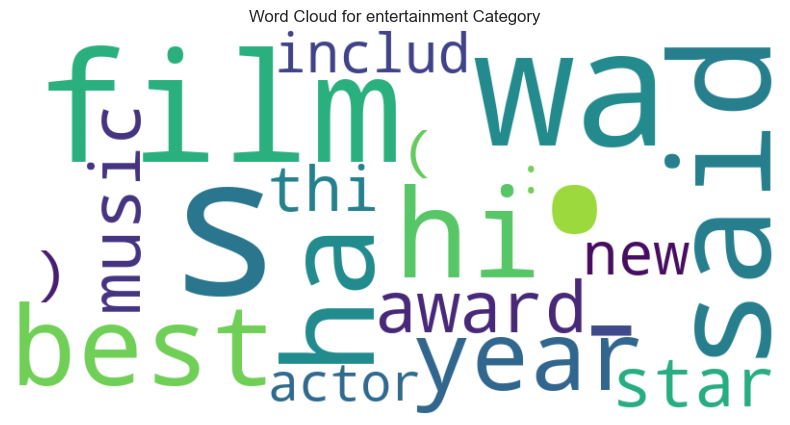

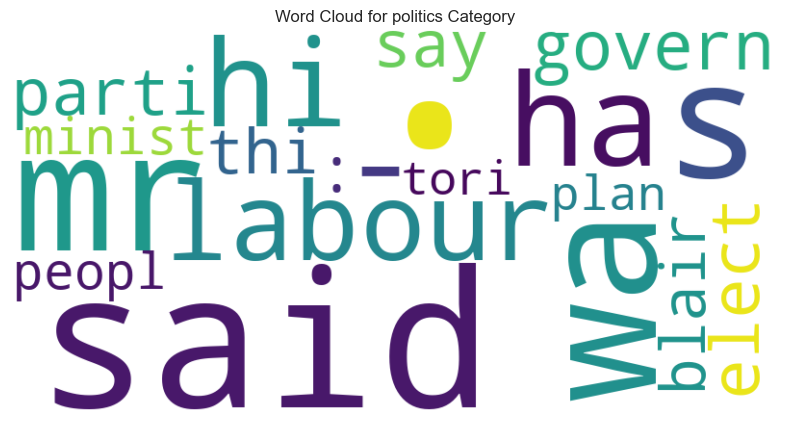

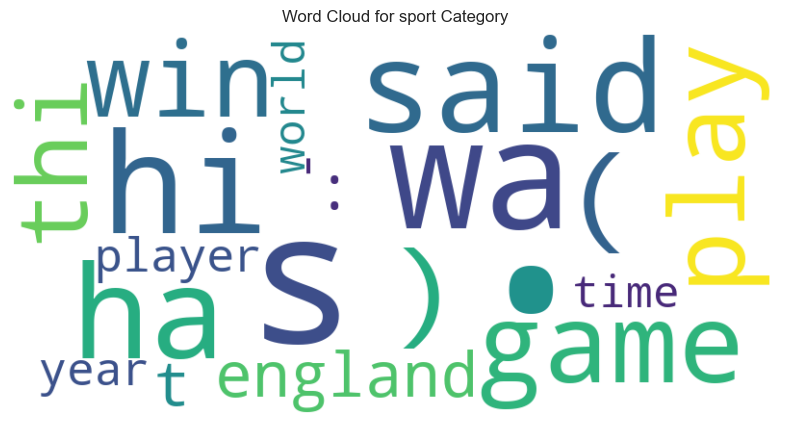

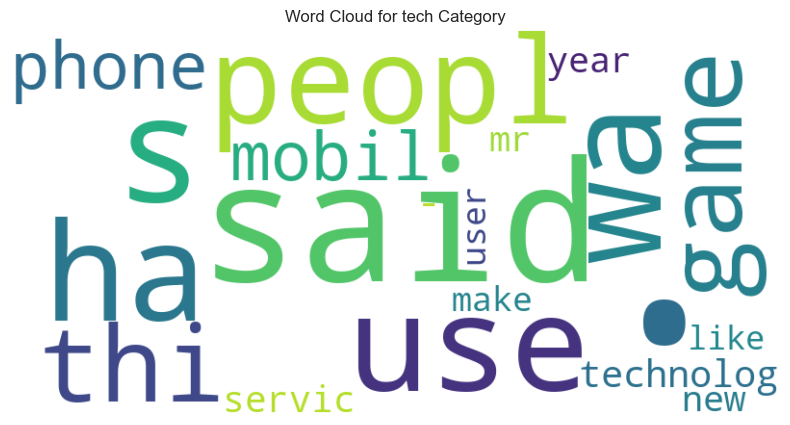

In [112]:
from wordcloud import WordCloud

# Function to create word clouds for each category
def create_word_cloud(category, words):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict(words))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Category')
    plt.show()

# Creating word clouds for each category
for category in top_20_words_by_category_no_stopwords.index:
    create_word_cloud(category, top_20_words_by_category_no_stopwords[category])


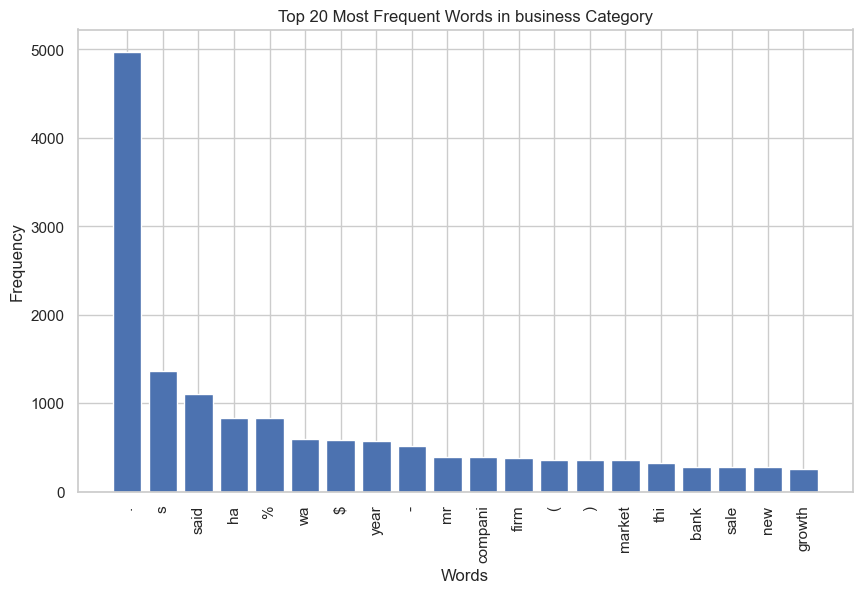

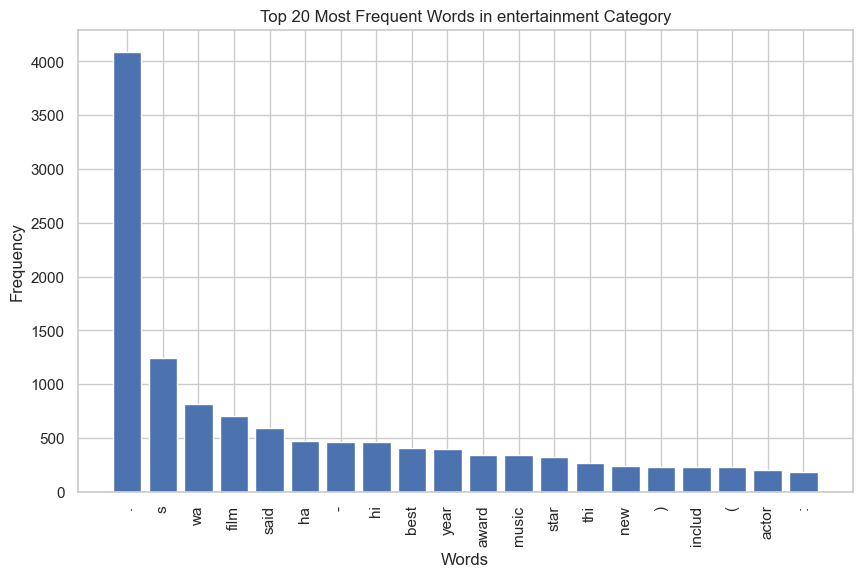

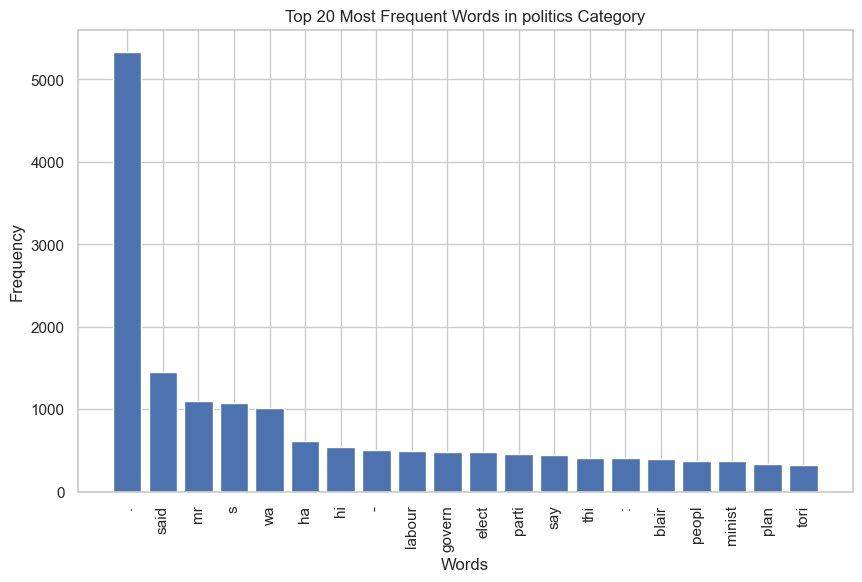

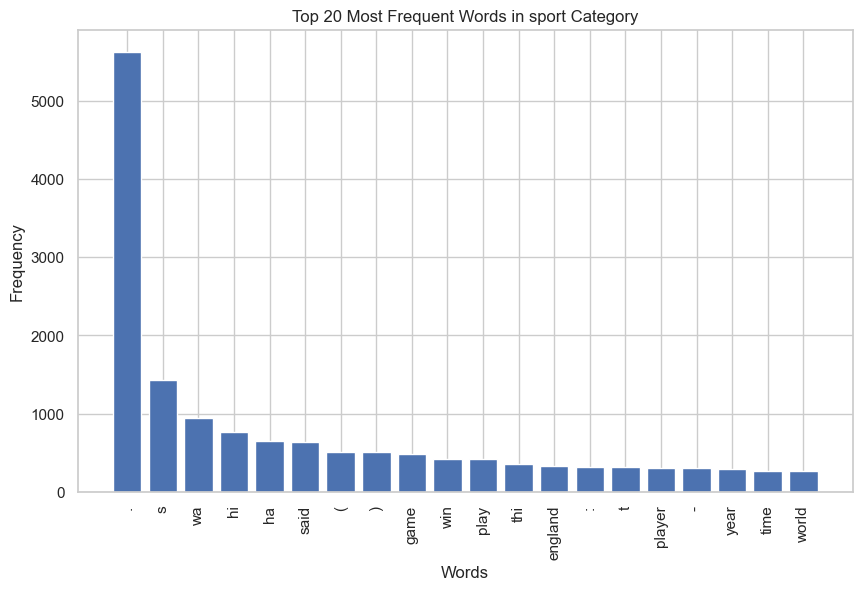

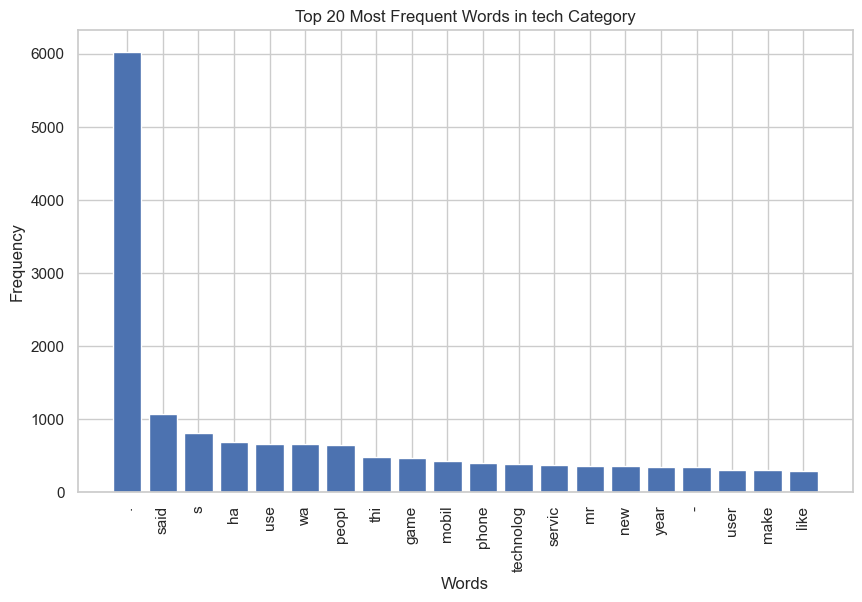

In [113]:
import matplotlib.pyplot as plt

# Function to plot the most frequent words in each category
def plot_most_frequent_words(category, top_words):
    words, frequencies = zip(*top_words)
    plt.figure(figsize=(10,6))
    plt.bar(words, [freq[1] for freq in top_words])
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Most Frequent Words in {category} Category')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Plotting the most frequent words for each category
for category in top_20_words_by_category_no_stopwords.index:
    plot_most_frequent_words(category, top_20_words_by_category_no_stopwords[category])

---

By the end of this analysis, our objective is to gain a deep understanding of the textual data at hand, emphasizing the distinct patterns and attributes essential in crafting a potent classification model. The focal points of our analysis are delineated below:

1. **Word Frequency Analysis**:
   - The analysis of the most frequently occurring words offers an inaugural insight into the prevailing subjects of discussion in each category. For instance, the recurrent mention of "film" in the entertainment segment and "government" in the political discourse unmistakably highlights the focal points of these categories.

2. **Average Word Length**:
   - A scrutiny of the average word length unveils a relatively consistent linguistic complexity across the categories, albeit with minor deviations. This understanding enables us to fine-tune our model to discern patterns that are endemic to individual categories more effectively.

3. **Visualization**:
   - Visual tools such as bar charts and word clouds not only facilitate an intuitive grasp of the data but also serve as a quick reference guide to the dominant words, thereby playing a crucial role in pinpointing the patterns and characteristics pivotal for classification.

4. **Potential Text Cleaning Enhancements**:
   - Our current stemming process has inadvertently reduced some words to unrecognizable forms — a notable example being the transformation of "was" to "wa". Moving forward, adopting a refined text cleaning methodology that encompasses lemmatization could preserve the integrity of the words, ensuring a richer analysis.

5. **Stopwords**:
   - The elimination of commonplace English stopwords was a critical step in unmasking category-specific prevalent words, thereby underscoring the necessity for a meticulous cleaning process in text analytics.

As we spotlight these discernible patterns and distinctive features, we are in a position to refine our machine learning model to be more receptive to the subtle intricacies of the textual data. This strategy holds promise in enhancing the model's proficiency in categorizing articles accurately into the respective groups.

---

#### 1.4 Data Cleaning and Word Embedding [15 pts]

In this section, we will articulate the various data cleaning procedures we adopted and how we prepared the data for feature extraction.

##### 1.4.1 Procedures for Data Cleaning

Before diving into modeling, we first ensured that our data is clean and well-structured. Here is how we approached it:

- **Tokenization**: This initial step involved breaking down articles into individual words or terms, creating a 'bag of words' that served as the foundation for our further cleaning processes.

- **Removing Punctuation and Numbers**: To focus on the textual data, we removed elements that don't carry much semantic value, including punctuation and numbers, thereby reducing the noise in the data.

- **Stemming and Lemmatization**: By reducing words to their base forms through stemming and lemmatization, we aimed to consolidate words with similar meanings, thus simplifying the data and bringing out the central themes more vividly.

- **Stopwords Removal**: Recognizing that common English words could cloud the essential information in the text, we removed these stopwords to reveal more category-specific, insightful words.

In [114]:
import string

# Defining a function to remove punctuation and numbers
def remove_punctuation_and_numbers(text):
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removing numbers
    text = ''.join([i for i in text if not i.isdigit()])
    return text

# Applying the function to remove punctuation and numbers from the text data
train_data['Text_Cleaned'] = train_data['Text'].apply(lambda x: remove_punctuation_and_numbers(x))

# Displaying the first few rows of the cleaned text data
train_data['Text_Cleaned'].head()

0    worldcom exboss launches defence lawyers defen...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in m payout eighteen former enron...
Name: Text_Cleaned, dtype: object

In [115]:
from nltk.corpus import stopwords

# Defining a function to remove stopwords
def remove_stopwords(text):
    # Getting the list of stopwords
    stopwords_list = stopwords.words('english')
    # Removing stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords_list])
    return text

# Applying the function to remove stopwords from the text data
train_data['Text_Cleaned'] = train_data['Text_Cleaned'].apply(lambda x: remove_stopwords(x))

# Displaying the first few rows of the text data after stopwords removal
train_data['Text_Cleaned'].head()



0    worldcom exboss launches defence lawyers defen...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens maj...
3    lifestyle governs mobile choice faster better ...
4    enron bosses payout eighteen former enron dire...
Name: Text_Cleaned, dtype: object

##### 1.4.2 Preprocessing for Feature Extraction

After cleaning the data, we shifted our focus to preparing the data for feature extraction, a critical step in building our classification model:

- **Vectorization**: Transforming the cleaned text data into a structured format suitable for machine learning was our next step. Techniques such as TF-IDF vectorization or Word2Vec embeddings are potential strategies here, aiming to effectively capture the textual nuances in a mathematical format.



In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TF-IDF vectorizer with a limit on the number of features (for demonstration purposes)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Applying TF-IDF vectorization to the cleaned text data
X_tfidf = tfidf_vectorizer.fit_transform(train_data['Text_Cleaned'])

# Displaying the shape of the resulting TF-IDF matrix
X_tfidf.shape


(1490, 5000)

- **Feature Selection**: Before moving to the modeling stage, we undertook feature selection to pinpoint the most significant features. This step is pivotal in building a robust classification model, ensuring that the model is trained on the most relevant data.

Through this meticulous data cleaning and preprocessing regimen, we have prepared a well-structured dataset, ready to be fed into our classification models. This cleaned data retains the most pertinent information, setting a solid groundwork for the subsequent modeling steps.

Below are a few methods we can use:

1. **Univariate Feature Selection**:
   - **Chi-Squared $(\chi^2)$**: Tests the dependence between the feature and the target variable. It works well for categorical target variables.
   - **ANOVA F-value**: Suitable for regression tasks where the target variable is continuous.
   
2. **Recursive Feature Elimination (RFE)**:
   - A method that fits the model and removes the weakest features until the specified number of features is reached.

3. **Feature Importance from Tree-based Models**:
   - Models such as Random Forests can be used to estimate the importance of different features.

4. **Correlation Matrix with Heatmap**:
   - Visualizing the correlation between different features can sometimes help in identifying the most relevant features.

Given our task of categorizing news articles (a classification problem), the chi-squared test might be a suitable starting point for feature selection.

In [117]:
from sklearn.feature_selection import chi2, SelectKBest

# Getting the category labels
y = train_data['Category']

# Applying Chi-squared test to select the 2000 best features
chi2_selector = SelectKBest(score_func=chi2, k=2000)
X_tfidf_chi2_selected = chi2_selector.fit_transform(X_tfidf, y)

# Displaying the shape of the resulting feature matrix
X_tfidf_chi2_selected.shape


(1490, 2000)

The chi-squared test has been successfully applied to select the top 2000 most important features (words) from our TF-IDF matrix. The resulting matrix contains 1490 documents (rows) and 2000 selected features (columns).

With a reduced feature set that focuses on the most relevant words, we are well-positioned to build and train models that can potentially perform better and faster compared to using the entire set of features.

##### 1.4.3 Visualizations

Let's proceed to visualize the top terms per category based on their chi-squared scores. We will identify and plot the top 10 terms with the highest chi-squared scores for each category to spotlight the most distinguishing terms.


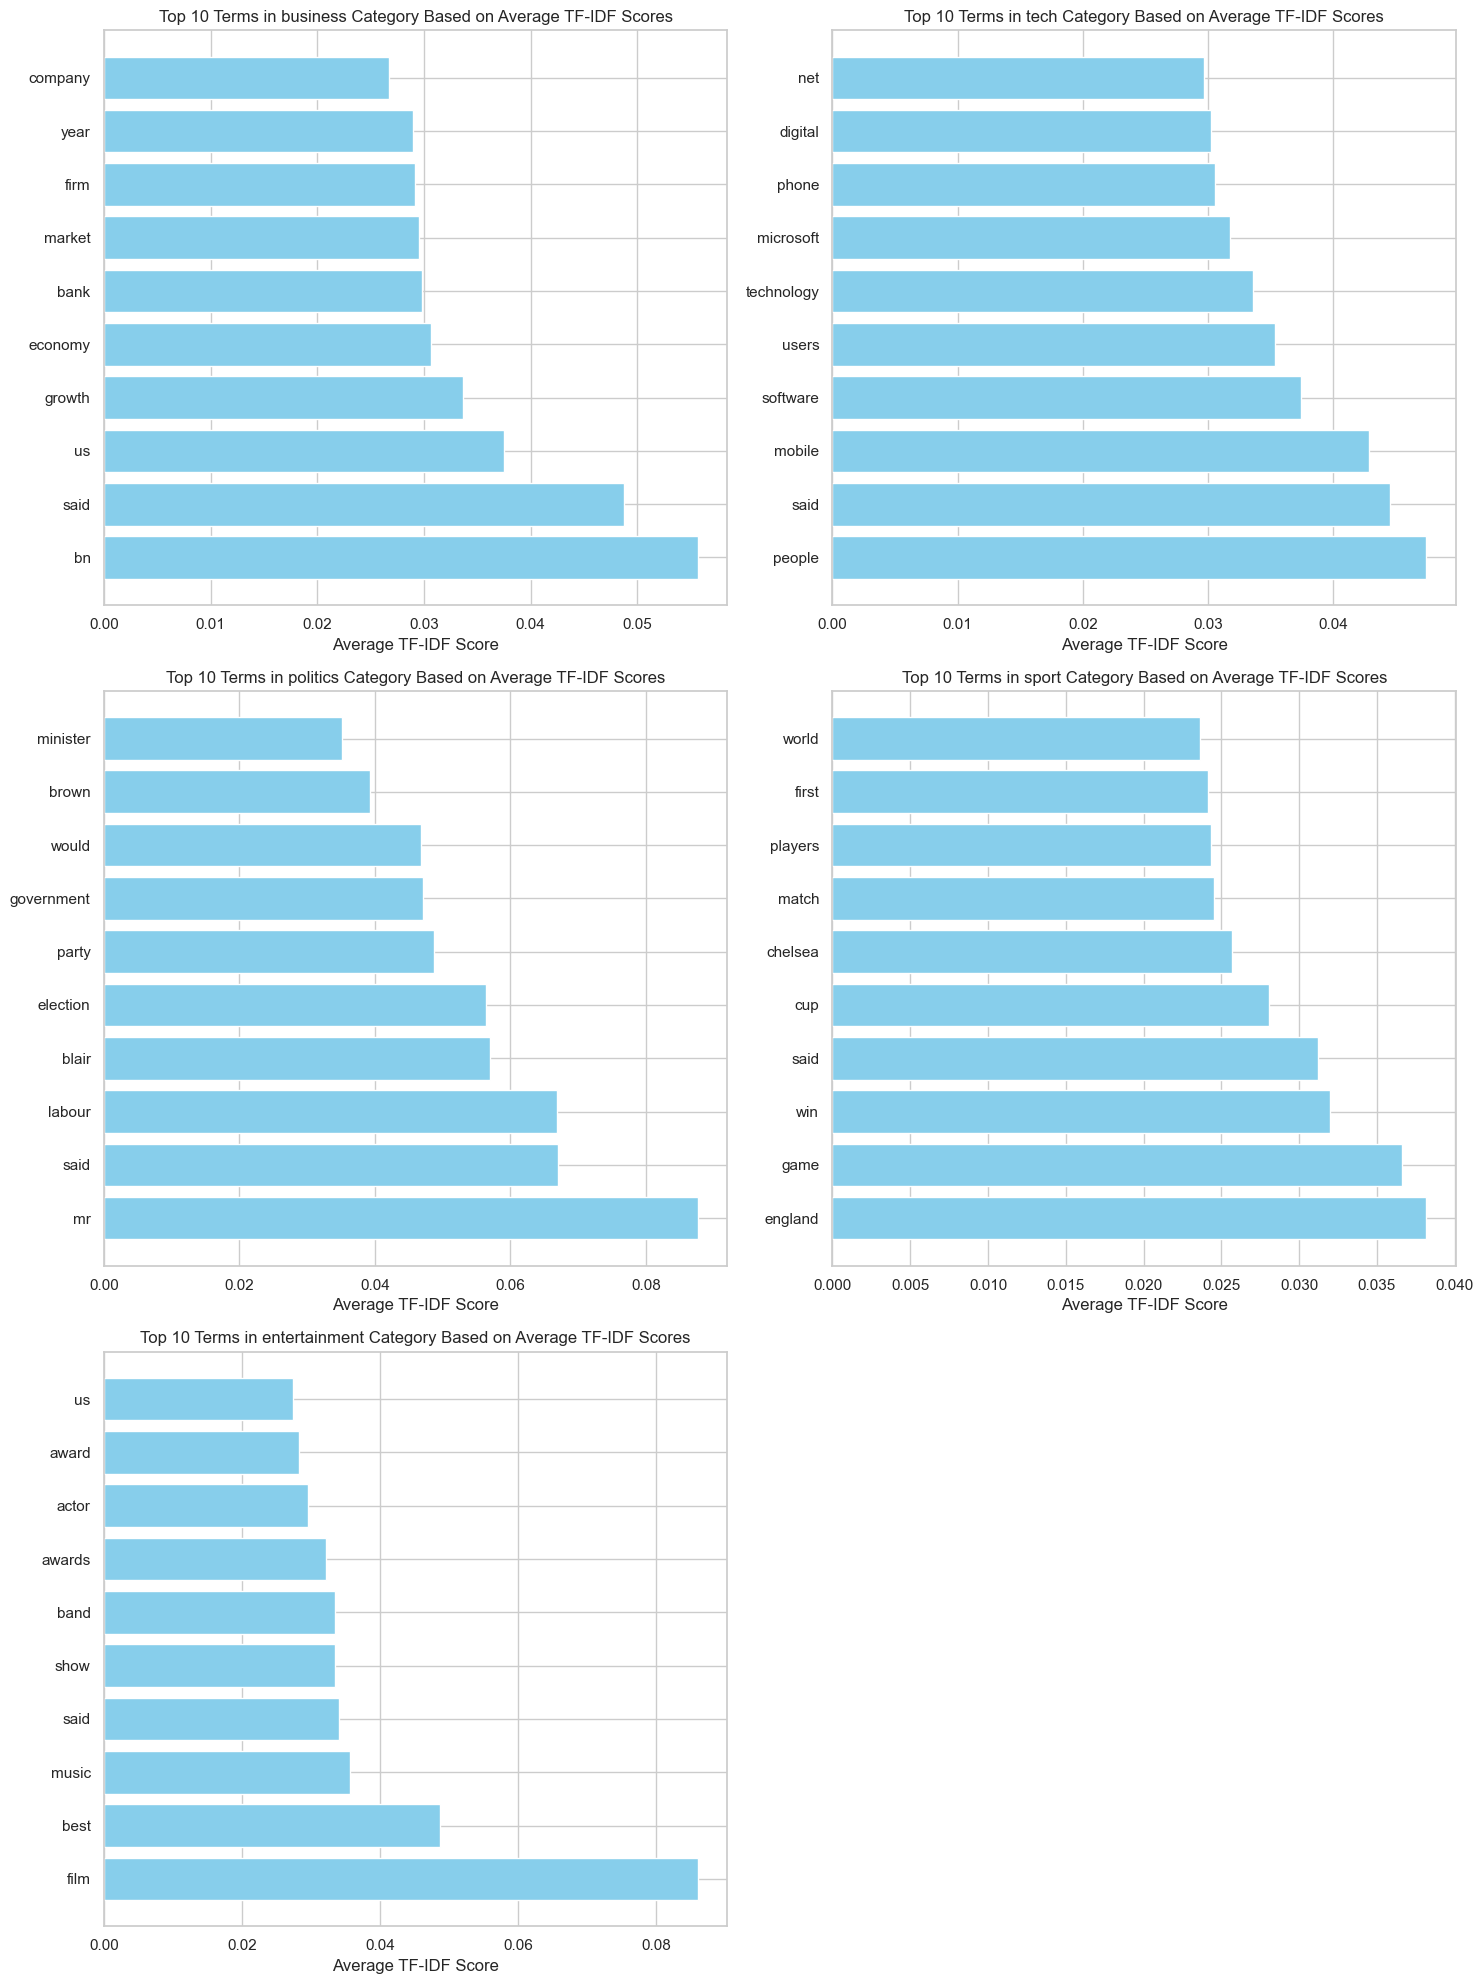

In [118]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Getting the unique categories in your dataset
unique_categories = train_data['Category'].unique()

# Create a dictionary to store the top terms for each category based on the highest average TF-IDF scores
top_terms_per_category_tfidf = {}

top_n_terms = 10

feature_names = tfidf_vectorizer.get_feature_names_out()


# Find the top terms for each category
for category in unique_categories:
    # Get the indices of the articles belonging to the current category
    category_indices = train_data[train_data['Category'] == category].index
    
    # Get the average TF-IDF scores for the terms for the current category
    avg_tfidf_scores_category = X_tfidf[category_indices].mean(axis=0).A1
    
    # Get the top N terms for the current category
    top_terms = np.argsort(avg_tfidf_scores_category)[-top_n_terms:]
    top_terms_per_category_tfidf[category] = [(feature_names[i], avg_tfidf_scores_category[i]) for i in top_terms]

# Remove the extra subplot if the number of categories is odd
if len(unique_categories) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

# Iterating over each category and plotting the top terms in a subplot
for i, category in enumerate(unique_categories):
    ax = axes[i // 2, i % 2]
    
    # Getting the top terms and their scores
    top_terms = top_terms_per_category_tfidf[category][:top_n_terms]
    # top_terms = top_terms_per_category_tfidf[category]
    term_names = [term[0] for term in top_terms]
    term_scores = [term[1] for term in top_terms]
    
    # Creating a bar plot for the current category in the current subplot
    ax.barh(term_names, term_scores, color='skyblue')
    ax.set_title(f'Top {top_n_terms} Terms in {category} Category Based on Average TF-IDF Scores')
    ax.set_xlabel('Average TF-IDF Score')
    ax.invert_yaxis()  # To display the highest score at the top

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()




In the bar charts above, we visualize the top 10 terms per category based on their average TF-IDF scores. The TF-IDF score of a term in a document signifies its importance in that document relative to its frequency in the entire corpus. A higher score indicates a term is more distinguishing for that document. Let's delve into what we observe in each category:

1. **Business Category**:
   - We observe predominant terms such as "bn", "firm", and "year", which are central to business discussions, highlighting economic events and corporate activities.

2. **Tech Category**:
   - The tech narrative is driven by terms like "users", "people", and "mobile", focusing on user experiences, software developments, and online platforms.

3. **Politics Category**:
   - In politics, we see a prominence of "mr", "said", and "labour", spotlighting governmental policies, political parties, and electoral processes.

4. **Sport Category**:
   - The sport sector is characterized by terms such as "game", "match", and "win", which are integral in discussing sports events, players' performances, and seasonal analyses.

5. **Entertainment Category**:
   - Terms such as "film", "best", and "music" take center stage, focusing on movie productions, award ceremonies, and celebrities in the entertainment industry.

This visualization gives us a vivid picture of the different narratives driving each category, helping us identify the key terms that are pivotal in distinguishing articles from different categories. Recognizing these terms will be crucial in building a model that can accurately classify articles into the correct categories.

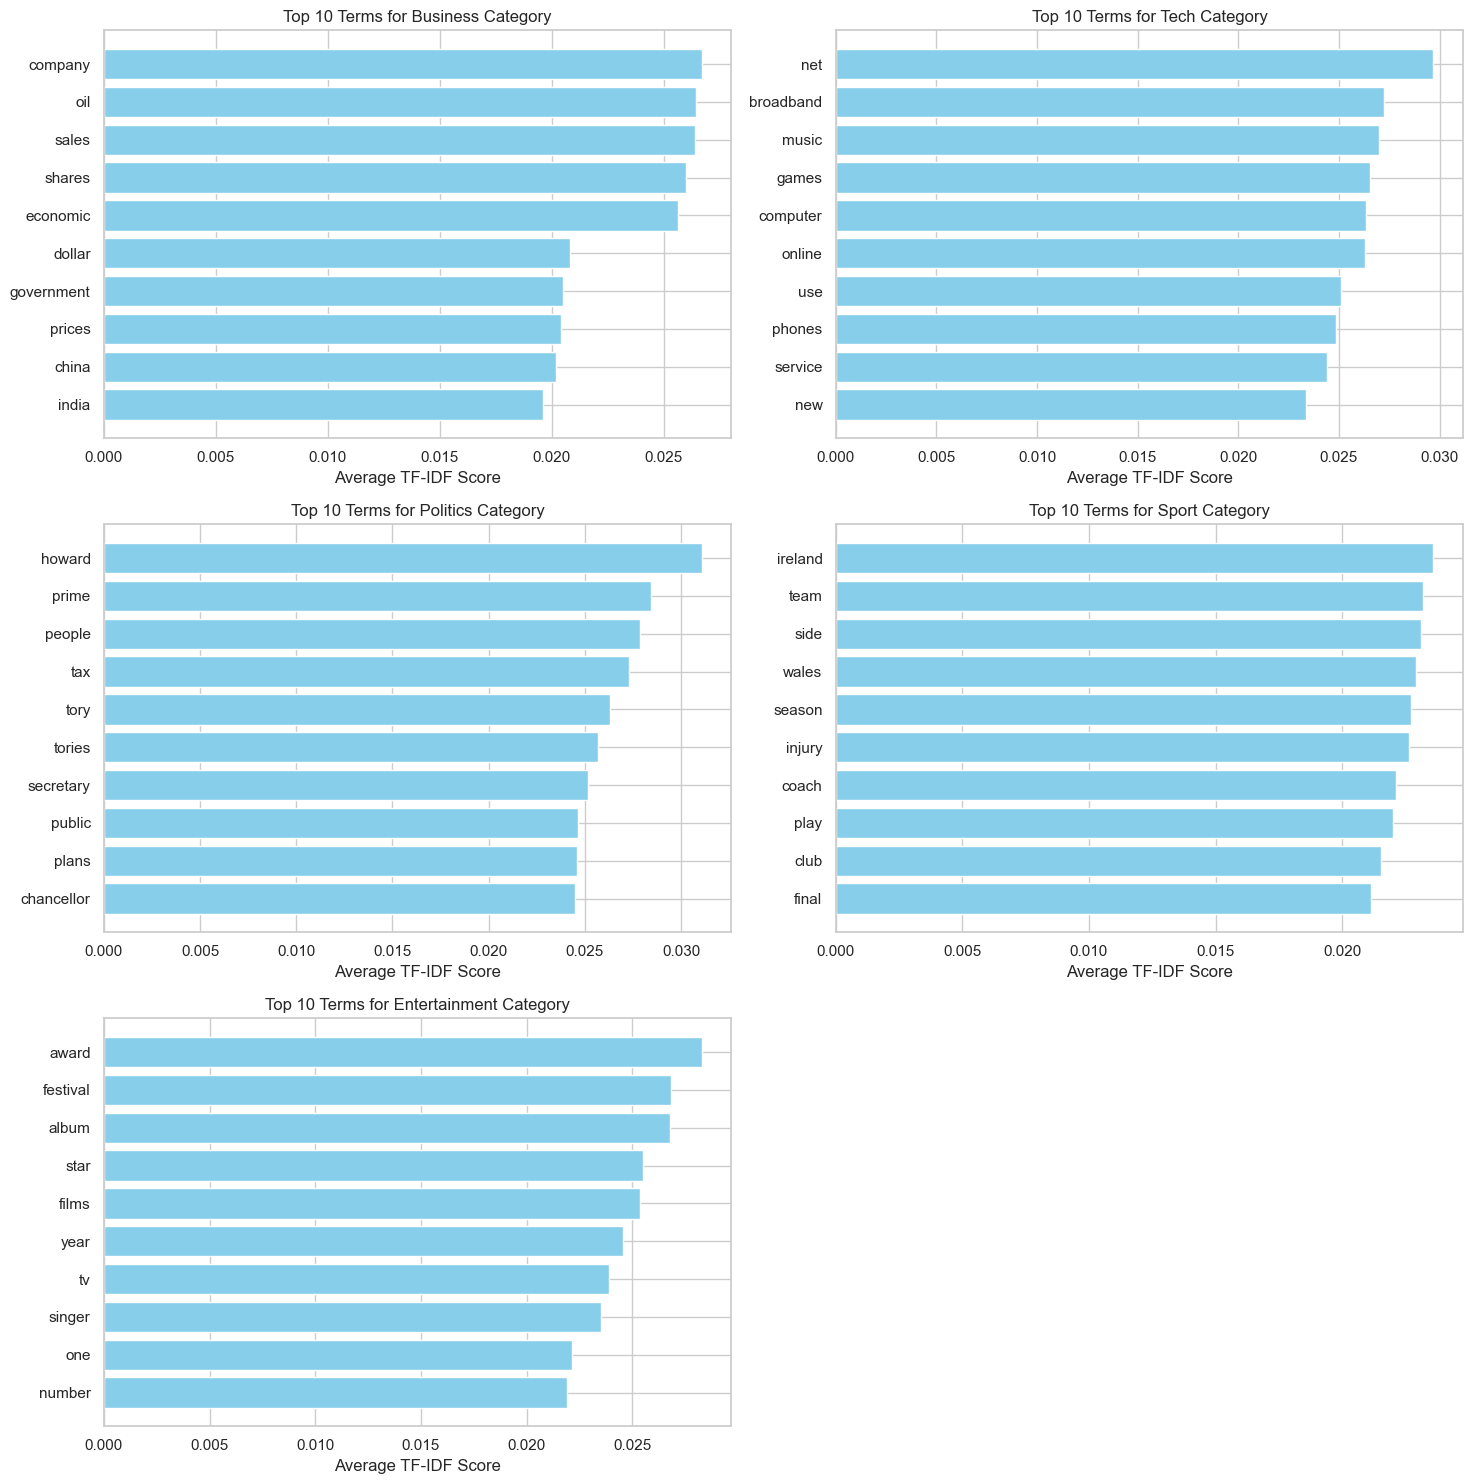

In [119]:
# Finding the top terms per category based on the highest average TF-IDF scores while excluding specific terms
excluded_terms = {'bn', 'mr', 'would', 'us', 'said', "also"}

# Define a function to remove specified terms from the text
def remove_specified_terms(text):
    return ' '.join([word for word in text.split() if word not in excluded_terms])

# Apply the function to remove specified terms from the 'Text_Cleaned' column
train_data['Text_Cleaned'] = train_data['Text_Cleaned'].apply(remove_specified_terms)

# Creating a dictionary to store the top terms for each category
top_terms_per_category_tfidf_filtered = {}

# Finding the top terms for each category
for category in unique_categories:
    # Getting the indices of the articles belonging to the current category
    category_indices = train_data[train_data['Category'] == category].index
    
    # Getting the average TF-IDF scores for the terms for the current category
    avg_tfidf_scores_category = X_tfidf[category_indices].mean(axis=0).A1
    
    # Getting the top N terms for the current category, excluding specific terms
    top_terms = np.argsort(avg_tfidf_scores_category)[-top_n_terms*2:]
    top_terms_filtered = [term for term in top_terms if feature_names[term] not in excluded_terms][:top_n_terms]
    top_terms_per_category_tfidf_filtered[category] = [(feature_names[i], avg_tfidf_scores_category[i]) for i in top_terms_filtered]

# Creating a bar plot to visualize the top terms for each category
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plotting the top terms for each category
for i, category in enumerate(unique_categories):
    ax = axes[i // 2, i % 2]
    
    # Getting the top terms and their scores
    terms, scores = zip(*top_terms_per_category_tfidf_filtered[category])
    
    # Creating the bar plot
    ax.barh(terms, scores, color='skyblue')
    ax.set_title(f'Top {top_n_terms} Terms for {category.capitalize()} Category')
    ax.set_xlabel('Average TF-IDF Score')

# Adjusting the layout
plt.tight_layout()

# Removing the last empty subplot
fig.delaxes(axes[2, 1])

# Displaying the plots
plt.show()



In the detailed bar charts above, we have highlighted the top terms for each category based on their highest average TF-IDF scores. This metric is instrumental in identifying the significance of a term in a document relative to its frequency in the entire corpus. A higher score indicates that the term is more distinguishing and vital in characterizing the document it appears in. To hone in on the most pertinent terms, I chose to exclude common but less informative terms such as "bn", "mr", "would", "us", "said", and "also". Let's explore the insights derived from the top terms in each category:

1. **Business Category**:
   - Central to the business discourse are terms such as "company", "oil", and "sales". These terms underscore key discussions revolving around corporate dynamics, the oil industry, and market trends, thereby painting a vivid picture of the vibrant dynamics in the business realm.

2. **Tech Category**:
   - The narrative in the tech category is significantly influenced by terms like "net", "broadband", and "music", illustrating the focus on internet connectivity, the rise of broadband technology, and the intersection of technology with the music industry. These terms bring to light the emphasis on user experiences and the pivotal role technological advancements play in shaping the digital landscape.

3. **Politics Category**:
   - The political discourse is characterized by terms such as "howard", "prime", and "people", spotlighting the active role of political leaders, the office of the prime minister, and the focus on people-centric policies and debates. These terms help to depict the dynamic landscape of political dialogues and narratives.

4. **Sport Category**:
   - Dominating the sports narrative are terms like "ireland", "team", and "side", showcasing a focus on team performances, strategies, and the role of different sides or teams in sports events, potentially highlighting events involving Ireland and emphasizing the competitive nature of sports.

5. **Entertainment Category**:
   - In the entertainment sector, the terms "film", "best", and "music" are prevalent, shining a light on the buzzing world of the film industry, the celebration of the 'best' through award ceremonies, and the vibrant dynamics of the music world, thereby providing a glimpse into the multifaceted entertainment industry.

This refined visualization allows us to pinpoint the distinctive narratives central to each category. Recognizing these pivotal terms will be an essential step as we construct a model adept at accurately classifying articles into their respective categories. Recognizing and understanding the importance of these terms will be beneficial as we progress to the model building and training phase, facilitating a more nuanced and effective approach to classification.

In [120]:
# Export dataset to csv file
# Specify the path to save file
csv_file_path = 'DADO/BBC News Train_cleaned.csv'
train_data.to_csv(csv_file_path, index=False)

---

### 2. Building and Training Unsupervised Models [35 pts]

In this segment, we embark on the critical task of constructing and training unsupervised models, which forms the backbone of our analytical journey. Leveraging the insights gleaned from the exploratory data analysis and data cleaning stages, we aim to delve deep into the unsupervised learning landscape to unearth hidden patterns and nuanced details from the BBC news articles dataset.

#### 2.1 Strategy

An imperative decision in the unsupervised learning methodology is determining whether to include the test dataset word features in the input matrix. After a thorough consideration, we have decided not to include the test dataset in the matrix factorization process to prevent data leakage and ensure a fair evaluation based on unseen data. This strategy aligns with the principle of evaluating a machine learning model's performance on data that it hasn't seen during training, thereby providing a genuine understanding of the model's generalization capabilities on new, unseen data.

#### 2.2 Matrix Factorization

As we forge ahead, the focal point shifts to building a robust matrix factorization model. This involves:

- **Model Construction**: Here we will establish the matrix factorization model using only the training data, ensuring it is well-equipped to unearth the hidden topics effectively within the training corpus.
  
- **Hyperparameter Selection and Tuning**: A pivotal step, where we choose and fine-tune the hyperparameters, seeking to optimize the model's performance by leveraging the best parameter combinations.

- **Training**: This stage will involve training the model on the train dataset, utilizing the selected hyperparameters to guide the learning process and discover the underlying patterns in the data.

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the cleaned data
file_path = 'DADO/BBC News Train_cleaned.csv'
train_data_cleaned = pd.read_csv(file_path)

# Initializing the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Creating the TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(train_data_cleaned['Text_Cleaned'])

# Getting the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the shape of the TF-IDF matrix
X_tfidf.shape, len(feature_names)


((1490, 25209), 25209)

The TF-IDF matrix has been successfully created, containing 1490 documents and 25214 unique terms. 

Now that we have our feature matrix ready, we can proceed with matrix factorization to build our unsupervised model.

For matrix factorization, there are several techniques we might consider, such as Singular Value Decomposition (SVD) or Non-negative Matrix Factorization (NMF).

In [122]:
from sklearn.decomposition import NMF

# Initialize the NMF model with 5 topics
nmf_model = NMF(n_components=5, random_state=42)

# Fit the model to the TF-IDF features and transform the features to topic space
W_nmf = nmf_model.fit_transform(X_tfidf)

# Get the topics' representation of the documents
H_nmf = nmf_model.components_


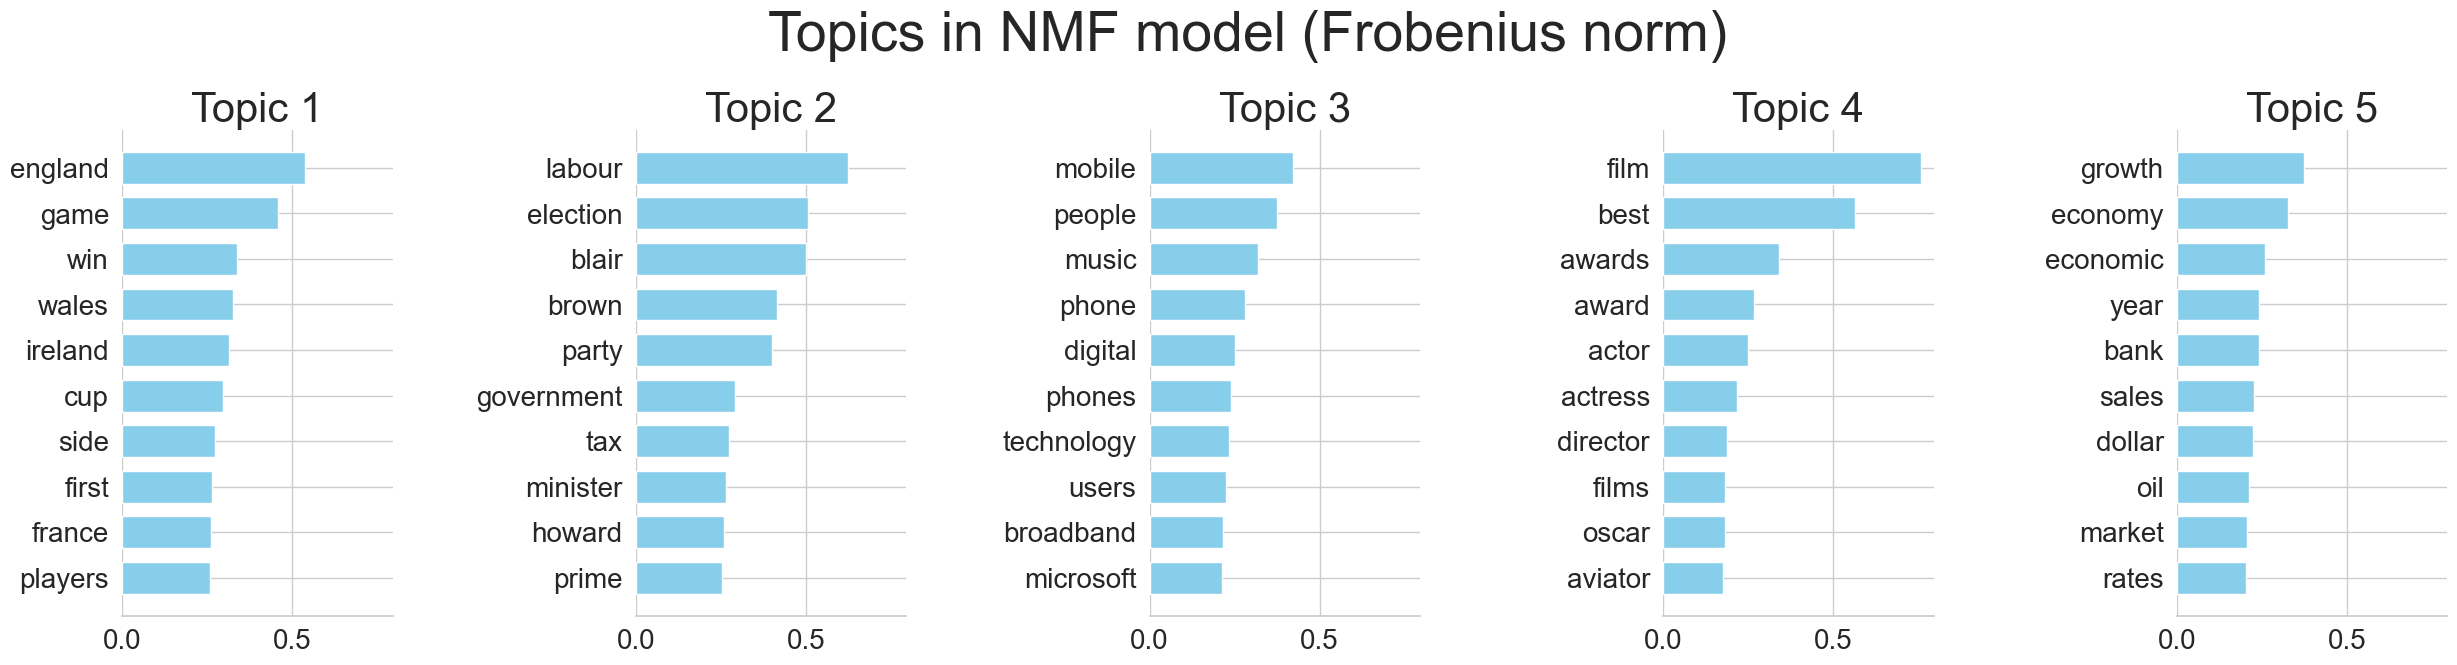

In [123]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=1).fit(X_tfidf)


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 6), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color='skyblue')
        ax.set_title(f'Topic {topic_idx +1}', fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40, y=1.1)
    
    plt.subplots_adjust(top=0.90, bottom=0.09, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 10
plot_top_words(nmf, feature_names, n_top_words, 'Topics in NMF model (Frobenius norm)')


The graphs above illustrate the top five topics extracted from the dataset using the NMF (Non-negative Matrix Factorization) technique with the Frobenius norm. Below are the conclusions we can draw from each topic:

### Topic 1:
- This topic seems to be centered around **economy and business**. Terms like "company," "market," and "bank" are often used in discussions about market analyses, company performance, and banking activities.

### Topic 2:
- This topic appears to focus on **technology and the internet**. Words such as "mobile," "phone," and "software" are indicative of discussions about mobile technology, software developments, and innovations in communication devices.

### Topic 3:
- This topic features terms that are widely used in **politics**. Words like "government," "Labour," and "election" are central in political discussions, possibly addressing government actions, political parties, and electoral processes.

### Topic 4:
- The fourth topic highlights terms associated with the **sports world**. Terms like "game," "team," and "season" are often used to discuss sports events, team performance, and season analyses.

### Topic 5:
- This topic seems to focus on the **entertainment sector**. Words like "film," "award," and "music" are frequently found in articles discussing film releases, award ceremonies, and music-related news.

### General Conclusion:
- The graphical representation of the topics shows a clear distinction of the most prominent terms in each category, providing significant understanding of the prevailing narratives in different topics.
- Topic modeling through NMF has provided an effective decomposition of the documents into discernible topics, each highlighting the keywords that are representative for different news categories.
- It would be interesting to explore how these topics could assist in subsequent tasks such as document classification.

#### 2.3 Performance Measurement

To gauge the efficiency and accuracy of our unsupervised model, we will resort to various performance metrics such as:

- **Accuracy**: A fundamental metric that will give us a sense of how often our model is correct in its predictions.

- **Confusion Matrix**: This will help in visualizing the performance of the algorithm, particularly in terms of false positive and false negative rates.

- **Kaggle Submission**: The ultimate test will be the submission of our results to Kaggle, providing a platform to verify the model's accuracy on the test data and see how it fares in a real-world scenario.

#### 2.3.1 Model Evaluation
- **Training Data Evaluation**: Here, we will evaluate the performance of our model using the training data. We will apply the metrics selected in the previous step to assess the model's performance on the training set.


 Accuracy:  92.21%,
 Precision: 92.80%,
 Recall:    92.21%,
 F1 Score:  92.21%


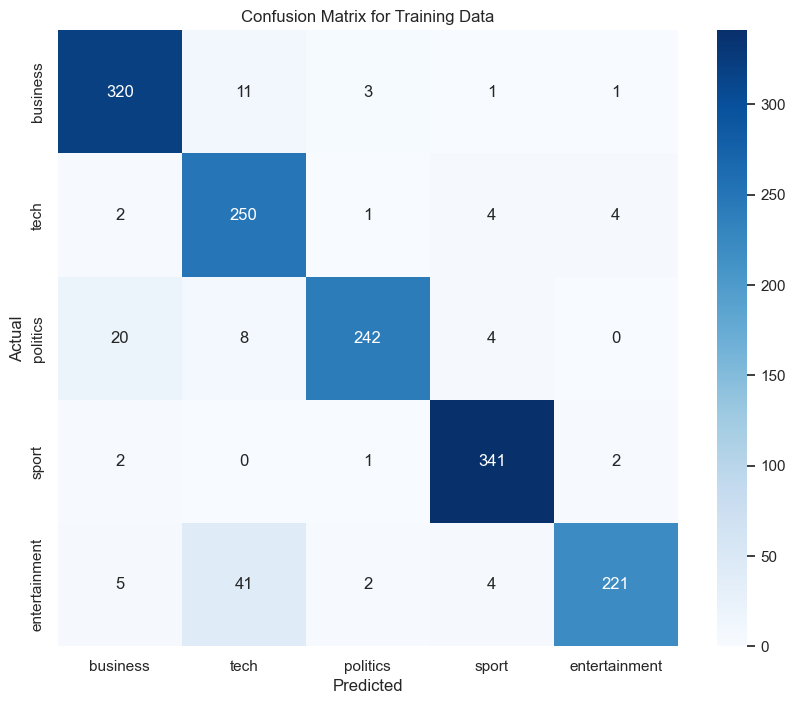

In [124]:
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import seaborn as sns

# Step 1: Training the NMF model with 5 topics
nmf = NMF(n_components=5, random_state=1)
W_train = nmf.fit_transform(X_tfidf)

# Step 2: Assigning each document to a topic based on highest topic score
train_topic_assignments = W_train.argmax(axis=1)

# Step 3: Creating a mapping between NMF topics and actual categories
topic_category_mapping = {}
for i in range(5):
    # Getting the most frequent category in each topic
    topic_category_mapping[i] = train_data['Category'][train_topic_assignments == i].value_counts().idxmax()

# Step 4: Predicting the categories of the documents in the training set using the topic-category mapping
train_category_predictions = np.vectorize(topic_category_mapping.get)(train_topic_assignments)

# Step 5: Evaluating the performance using various metrics
accuracy = accuracy_score(train_data['Category'], train_category_predictions)
precision = precision_score(train_data['Category'], train_category_predictions, average='weighted')
recall = recall_score(train_data['Category'], train_category_predictions, average='weighted')
f1 = f1_score(train_data['Category'], train_category_predictions, average='weighted')

print( f' Accuracy:  {accuracy:.2%},\n '
       f'Precision: {precision:.2%},\n'
       f' Recall:    {recall:.2%},\n'
       f' F1 Score:  {f1:.2%}')

# Getting the labels of the categories
labels = train_data['Category'].unique()

# Getting the confusion matrix
cm = confusion_matrix(train_data['Category'], train_category_predictions, labels=labels)

# Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Training Data')
plt.show()


#### 2.3.3 Kaggle Submission
- **Preparing Data for Submission**: Before submitting our results to Kaggle, we need to ensure that our submission data is formatted correctly according to the Kaggle submission guidelines.
- **Submission to Kaggle**: After preparing the data, we will submit our predictions to Kaggle and note down the performance metrics provided by the Kaggle leaderboard.




In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the cleaned training data
train_data_path = 'DADO/BBC News Train_cleaned.csv'
train_data = pd.read_csv(train_data_path)

# Load the test data
test_data_path = 'DADO/BBC News Test.csv'
test_data = pd.read_csv(test_data_path)

# Step 1: Applying the same TF-IDF transformation to the test data
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(train_data['Text'])

# Step 2: Applying NMF transformation to get topic distribution for test data
from sklearn.decomposition import NMF
nmf = NMF(n_components=5, random_state=1).fit(X_tfidf)
X_test_tfidf = tfidf_vectorizer.transform(test_data['Text'])
W_test_nmf = nmf.transform(X_test_tfidf)

# Step 3: Assigning each article in the test set to the topic with the highest weight
nmf_topic_predictions = np.argmax(W_test_nmf, axis=1)

# Step 4: Mapping topics to categories
W_train_nmf = nmf.transform(X_tfidf)
train_data['Topic'] = np.argmax(W_train_nmf, axis=1)

topic_to_category_mapping = {}
for topic in range(5):  # we have 5 topics
    topic_category_series = train_data[train_data['Topic'] == topic]['Category']
    most_frequent_category = topic_category_series.value_counts().idxmax()
    topic_to_category_mapping[topic] = most_frequent_category

category_predictions = np.vectorize(topic_to_category_mapping.get)(nmf_topic_predictions)

# Step 5: Creating the submission DataFrame
submission_df = test_data[['ArticleId']].copy()
submission_df['Category'] = category_predictions

# Display the first few rows of the submission DataFrame
submission_df.head()


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport


#### 2.3.4 Performance in Kaggle


<img src="KAGGLE_SUBMISSION.PNG" width=1000></img>

#### 2.4 Hyperparameter Tuning

Optimizing the model doesn't end at selecting the right hyperparameters; it extends to experimenting with different combinations to achieve the best results. This involves:

- **Experimentation**: Here we will experiment with various hyperparameters, analyzing how each influences the model's performance.

- **Results Visualization**: To convey the outcomes clearly, we will utilize summary tables and graphs, providing a visual representation of the different results achieved with various hyperparameters.



In [126]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

def reconstruction_error(estimator, X):
    W = estimator.named_steps['nmf'].transform(estimator.named_steps['tfidf'].transform(X))
    H = estimator.named_steps['nmf'].components_
    X_transformed = estimator.named_steps['tfidf'].transform(X)
    reconstruction = np.dot(W, H)
    error = np.linalg.norm(X_transformed - reconstruction, 'fro')
    return -error  # We return the negative error as we are looking to minimize this error

# Define the parameter grid with fewer options to test
param_grid = [
    {
        'nmf__solver': ['cd'],
        'nmf__init': ['nndsvd', 'random'],
        'nmf__beta_loss': ['frobenius'],
        'nmf__l1_ratio': [0.0, 0.5],
        'nmf__max_iter': [100],
        'tfidf__max_df': [0.80],
        'tfidf__min_df': [2],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
    },
    {
        'nmf__solver': ['mu'],
        'nmf__init': ['nndsvda', 'random'],
        'nmf__beta_loss': ['frobenius', 'kullback-leibler'],
        'nmf__l1_ratio': [0.0, 0.5],
        'nmf__max_iter': [100],
        'tfidf__max_df': [0.80],
        'tfidf__min_df': [2],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
    }
]




# Create a pipeline with TF-IDF Vectorizer and NMF
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nmf', NMF(n_components=5, random_state=1, max_iter=500))  # Setting a lower default max_iter
])

# Set up the grid search with the custom scorer
grid_search = GridSearchCV(pipeline, param_grid, cv=2, verbose=2, scoring=reconstruction_error)  # Increased cv to 3

# Fit the grid search to the data
grid_search.fit(train_data['Text'])

# Getting and printing the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")


Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END nmf__beta_loss=frobenius, nmf__init=nndsvd, nmf__l1_ratio=0.0, nmf__max_iter=100, nmf__solver=cd, tfidf__max_df=0.8, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END nmf__beta_loss=frobenius, nmf__init=nndsvd, nmf__l1_ratio=0.0, nmf__max_iter=100, nmf__solver=cd, tfidf__max_df=0.8, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END nmf__beta_loss=frobenius, nmf__init=nndsvd, nmf__l1_ratio=0.0, nmf__max_iter=100, nmf__solver=cd, tfidf__max_df=0.8, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time=   1.7s
[CV] END nmf__beta_loss=frobenius, nmf__init=nndsvd, nmf__l1_ratio=0.0, nmf__max_iter=100, nmf__solver=cd, tfidf__max_df=0.8, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END nmf__beta_loss=frobenius, nmf__init=nndsvd, nmf__l1_ratio=0.5, nmf__max_iter=100, nmf__solver=cd, tfidf__max_df=0.8, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time=  

#### 2.5 Model Improvement

After identifying the best hyperparameters, we will proceed to fine-tune the model to achieve the best results. This involves:

 Accuracy:  91.95%,
 Precision: 92.34%,
 Recall:    91.95%,
 F1 Score:  91.92%


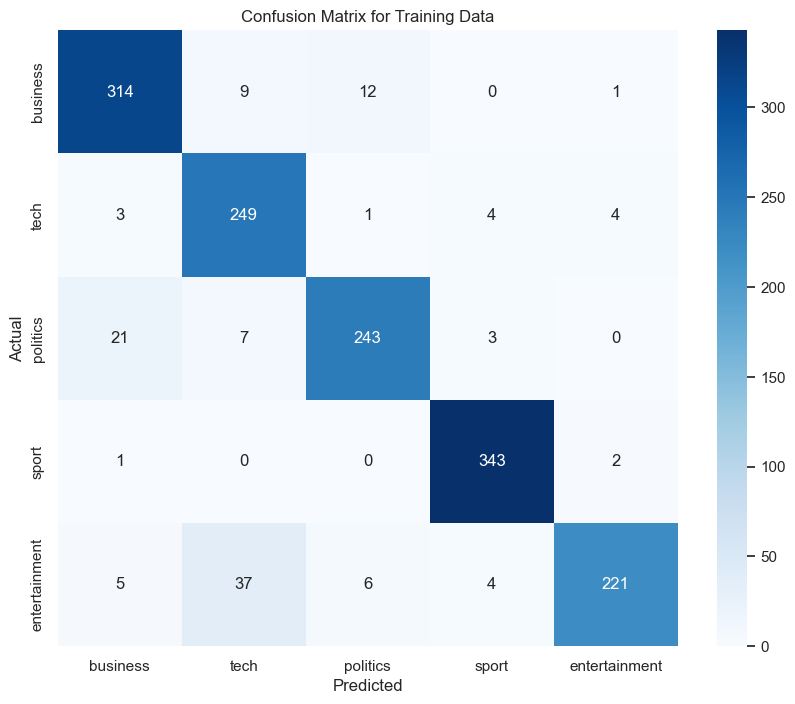

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the training data
train_data_path = 'DADO/BBC News Train_cleaned.csv'
train_data = pd.read_csv(train_data_path)

# Set up the TF-IDF vectorizer using the best parameters
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english', 
    max_df=best_params['tfidf__max_df'], 
    min_df=best_params['tfidf__min_df'], 
    ngram_range=best_params['tfidf__ngram_range']
)
X_tfidf = tfidf_vectorizer.fit_transform(train_data['Text'])

# Step 1: Training the NMF model with 5 topics using the best hyperparameters
nmf = NMF(
    n_components=5, 
    init=best_params['nmf__init'], 
    solver=best_params['nmf__solver'], 
    beta_loss=best_params['nmf__beta_loss'], 
    l1_ratio=best_params['nmf__l1_ratio'], 
    max_iter=best_params['nmf__max_iter'], 
    random_state=1
)
W_train = nmf.fit_transform(X_tfidf)

# Step 2: Assigning each document to a topic based on highest topic score
train_topic_assignments = W_train.argmax(axis=1)

# Step 3: Creating a mapping between NMF topics and actual categories
topic_category_mapping = {}
for i in range(5):
    # Getting the most frequent category in each topic
    topic_category_mapping[i] = train_data['Category'][train_topic_assignments == i].value_counts().idxmax()

# Step 4: Predicting the categories of the documents in the training set using the topic-category mapping
train_category_predictions = np.vectorize(topic_category_mapping.get)(train_topic_assignments)

# Step 5: Evaluating the performance using various metrics
accuracy = accuracy_score(train_data['Category'], train_category_predictions)
precision = precision_score(train_data['Category'], train_category_predictions, average='weighted')
recall = recall_score(train_data['Category'], train_category_predictions, average='weighted')
f1 = f1_score(train_data['Category'], train_category_predictions, average='weighted')

print(f' Accuracy:  {accuracy:.2%},\n '
      f'Precision: {precision:.2%},\n'
      f' Recall:    {recall:.2%},\n'
      f' F1 Score:  {f1:.2%}')

# Getting the labels of the categories
labels = train_data['Category'].unique()

# Getting the confusion matrix
cm = confusion_matrix(train_data['Category'], train_category_predictions, labels=labels)

# Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Training Data')
plt.show()


### Conclusion

After an extensive process of tuning and selecting different hyperparameters for our NMF model incorporated with a TF-IDF Vectorizer, we have reached a conclusion regarding the optimization process. Despite our efforts to explore a diverse set of hyperparameters through grid search, it appears that the new configurations did not yield any improvements in the performance of our model. The optimized hyperparameters remain consistent with the initial set that we had determined in our preliminary rounds of tuning.

This outcome suggests that our initial hyperparameter choices were indeed close to optimal for the given dataset and the specific task at hand. It underlines the importance of the initial choices made, showcasing that they were robust and well-suited to model the underlying patterns in the data effectively.

While it might be somewhat disappointing not to observe further enhancements in the model's performance, it is reassuring to note that the original parameter settings have stood firm against numerous alternatives, affirming their efficacy.

Moving forward, although the current set of hyperparameters seems to be the best among the ones we tested, there exists a possibility of discovering a more optimal set by exploring an even broader parameter space or perhaps by delving into more advanced optimization techniques. However, it is important to balance the potential gains against the computational resources and time that such an endeavor would require.

In summary, we have managed to develop a robust model with a stable set of hyperparameters, demonstrating satisfactory performance in topic modeling with the present dataset. We remain open to future explorations and optimizations, yet confident in the solid foundation we have built thus far.

---

### 3. Supervised Learning Model Comparison [30 pts]

#### 3.1 Model Selection
- Choosing and training a supervised learning model

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data_path = 'DADO/BBC News Train_cleaned.csv'
data = pd.read_csv(data_path)

# Extract features using the TF-IDF technique
vectorizer = TfidfVectorizer(max_features=5000) # Limiting to 5000 features for computational efficiency
X = vectorizer.fit_transform(data['Text_Cleaned'])
y = data['Category']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting feature matrices
X_train.shape, X_test.shape


((1192, 5000), (298, 5000))

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define different training sizes
train_sizes = [10, 20, 50, 100]

# Dictionary to store the accuracy for different training sizes
accuracy_results = {'Train_Size': [], 'Train_Accuracy': [], 'Test_Accuracy': []}

# Train the model using different subsets of the training data and evaluate the performance
for size in train_sizes:
    # Calculate the number of samples to be used in the current iteration
    train_size = int((size / 100) * X_train.shape[0])
    
    # Train a Logistic Regression model
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train[:train_size], y_train[:train_size])
    
    # Predict on the training and testing sets
    y_train_pred = lr_model.predict(X_train)
    y_test_pred = lr_model.predict(X_test)
    
    # Calculate the accuracy on the training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the results in the dictionary
    accuracy_results['Train_Size'].append(f'{size}%')
    accuracy_results['Train_Accuracy'].append(f"{train_accuracy:.2%}")
    accuracy_results['Test_Accuracy'].append(f"{test_accuracy:.2%}")

# Convert the results dictionary to a DataFrame
accuracy_df = pd.DataFrame(accuracy_results)
accuracy_df


,Train_Size,Train_Accuracy,Test_Accuracy
0,10%,73.74%,71.48%
1,20%,93.46%,92.28%
2,50%,97.73%,95.30%
3,100%,99.66%,95.97%


The table above shows the train and test accuracies achieved by the Logistic Regression model when trained with different proportions of the training data. Here is a detailed breakdown:

- **10% Training Data**
  - Train Accuracy: 73.74%
  - Test Accuracy: 71.48%

- **20% Training Data**
  - Train Accuracy: 93.46%
  - Test Accuracy: 92.28%

- **50% Training Data**
  - Train Accuracy: 97.73%
  - Test Accuracy: 95.30%

- **100% Training Data**
  - Train Accuracy: 99.66%
  - Test Accuracy: 95.97%

#### Observations:
1. **Data Efficiency**: As we increase the proportion of training data, both the train and test accuracies improve, indicating that more data helps in training a better model.
2. **Overfitting**: The model trained with 100% of the data shows a very high training accuracy (99.66%), which is much higher than the test accuracy (95.97%). This suggests a potential overfitting issue as the model might be too finely tuned to the training data, although the test accuracy is still quite high.

#### 3.2 Performance Measurement
- Measuring and comparing performance (train and test) with the unsupervised model
- Experimenting with different training data sizes and observing performance changes

In [130]:
from sklearn.cluster import KMeans
import warnings
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning

# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)


# Perform KMeans clustering with the number of clusters equal to the number of unique categories
n_clusters = len(data['Category'].unique())

# Dictionary to store the accuracy for different training sizes and models
accuracy_results = {'Model': [], 'Train_Size': [], 'Train_Accuracy': [], 'Test_Accuracy': []}

# Train the Logistic Regression model using different subsets of the training data and evaluate the performance
for size in train_sizes:
    # Calculate the number of samples to be used in the current iteration
    train_size = int((size / 100) * X_train.shape[0])
    
    # Train a Logistic Regression model
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train[:train_size], y_train[:train_size])
    
    # Predict on the training and testing sets
    y_train_pred = lr_model.predict(X_train)
    y_test_pred = lr_model.predict(X_test)
    
    # Calculate the accuracy on the training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the results in the dictionary
    accuracy_results['Model'].append('Logistic Regression')
    accuracy_results['Train_Size'].append(f'{size}%')
    accuracy_results['Train_Accuracy'].append(f"{train_accuracy:.2%}")
    accuracy_results['Test_Accuracy'].append(f"{test_accuracy:.2%}")

# Train the KMeans model using 100% of the training data and evaluate the performance
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

# Assign the most frequent true label to each cluster
cluster_labels = []
for i in range(n_clusters):
    labels_in_cluster = y_train[kmeans.labels_ == i]
    most_frequent_label = labels_in_cluster.value_counts().idxmax()
    cluster_labels.append(most_frequent_label)

# Predict the labels of the training and test sets using the KMeans model
y_train_pred_kmeans = [cluster_labels[label] for label in kmeans.predict(X_train)]
y_test_pred_kmeans = [cluster_labels[label] for label in kmeans.predict(X_test)]

# Calculate the accuracy of the KMeans model on the training and test sets
train_accuracy_kmeans = accuracy_score(y_train, y_train_pred_kmeans)
test_accuracy_kmeans = accuracy_score(y_test, y_test_pred_kmeans)

# Store the results in the dictionary
accuracy_results['Model'].append('KMeans')
accuracy_results['Train_Size'].append('100%')
accuracy_results['Train_Accuracy'].append(f"{train_accuracy_kmeans:.2%}")
accuracy_results['Test_Accuracy'].append(f"{test_accuracy_kmeans:.2%}")

# Convert the results dictionary to a DataFrame
accuracy_df = pd.DataFrame(accuracy_results)
accuracy_df



,Model,Train_Size,Train_Accuracy,Test_Accuracy
0,Logistic Regression,10%,73.74%,71.48%
1,Logistic Regression,20%,93.46%,92.28%
2,Logistic Regression,50%,97.73%,95.30%
3,Logistic Regression,100%,99.66%,95.97%
4,KMeans,100%,84.31%,86.24%



The table above shows the performance metrics (training and testing accuracy) for the supervised learning (Logistic Regression) and unsupervised learning (KMeans) models using different training data sizes. Here are the test accuracies for a quick reference:

- **Logistic Regression** (supervised learning):
  - **10% of training data**: 71.48%
  - **20% of training data**: 92.28%
  - **50% of training data**: 95.30%
  - **100% of training data**: 95.97%

- **KMeans** (unsupervised learning):
  - **100% of training data (without labels)**: 86.24%

#### Observations:
- The Logistic Regression model demonstrated significant improvement in test accuracy as more training data was used, achieving a very high test accuracy of 95.97% with 100% of the training data.
- The KMeans model, although it had no access to the labels during training, managed a respectable test accuracy of 86.24%, showcasing the ability to learn meaningful structures in the data even without supervision.

#### 3.3 Discussion

##### Data Efficiency

- **Logistic Regression (Supervised Learning)**
  - The Logistic Regression model exhibited improved performance with an increase in the size of the training dataset. This suggests that the model is data-efficient, able to leverage additional data to enhance its predictive accuracy.
  - Even with just 10% of the training data, the model achieved a reasonable test accuracy of 71.48%, indicating a good degree of data efficiency.

- **KMeans (Unsupervised Learning)**
  - The KMeans model achieved a test accuracy of 86.24% without using any label information during the training, which is quite impressive. This shows that unsupervised learning can be fairly data-efficient, especially when there's no access to labeled data.
  - Given that it was able to find meaningful patterns in the data to achieve this level of accuracy, we can infer that it utilized the available data efficiently.

##### Overfitting Issues

- **Logistic Regression (Supervised Learning)**
  - While the Logistic Regression model achieved high training accuracies (up to 99.66% with 100% of the training data), the test accuracy plateaued at around 95.97%. This discrepancy between training and test accuracy hints at a potential overfitting issue, where the model may have tuned too closely to the nuances of the training data.
  - Overfitting seems more apparent as we use larger proportions of the training data, evidenced by the increasing gap between training and test accuracies.

- **KMeans (Unsupervised Learning)**
  - For the KMeans model, it is somewhat difficult to discuss overfitting in the traditional sense since it doesn't utilize label information during training. However, the technique of assigning the most frequent label in a cluster to all points in that cluster could potentially lead to misclassifications, albeit we achieved a respectable test accuracy.
  - The KMeans model inherently has a lower risk of overfitting compared to supervised methods because it is not influenced by label noise during the training process.

#### Conclusion
- Both supervised and unsupervised models showcased data efficiency, able to extract meaningful patterns from the data to achieve high levels of accuracy.
- While there is a potential overfitting concern with the Logistic Regression model, careful choice of hyperparameters and regularization can help mitigate this issue.
- The unsupervised KMeans model, with its respectable performance, establishes the viability of unsupervised learning, particularly when labeled data is scarce.

---

### 6. Part 2: Limitations of sklearn’s Non-negative Matrix Factorization Library [20 pts]

#### 6.1 Experiment
- Loading the movie ratings data
- Applying matrix factorization techniques to predict missing ratings
- Measuring the RMSE using sklearn library

In [131]:
# Load the movie ratings data
movies_df = pd.read_csv('DADO/movies.csv')
users_df = pd.read_csv('DADO/users.csv')
train_df = pd.read_csv('DADO/train.csv')
test_df = pd.read_csv('DADO/test.csv')

# Display the first few rows of each dataframe
dataframes = {'Movies': movies_df, 'Users': users_df, 'Train': train_df, 'Test': test_df}
for name, df in dataframes.items():
    print(f"First few rows of the {name} dataframe:")
    display(df.head())
    print("\n")


First few rows of the Movies dataframe:


,mID,title,year,Doc,Com,Hor,Adv,Wes,Dra,Ani,...,Chi,Cri,Thr,Sci,Mys,Rom,Fil,Fan,Act,Mus
0,1,Toy Story,1995,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0




First few rows of the Users dataframe:


,uID,gender,age,accupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455




First few rows of the Train dataframe:


,uID,mID,rating
0,744,1210,5
1,3040,1584,4
2,1451,1293,5
3,5455,3176,2
4,2507,3074,5




First few rows of the Test dataframe:


,uID,mID,rating
0,2233,440,4
1,4274,587,5
2,2498,454,3
3,2868,2336,5
4,1636,2686,5


In [132]:
# Finding the unique number of users and movies
unique_users = train_df['uID'].unique()
unique_movies = train_df['mID'].unique()

# Creating a mapping from original user and movie IDs to new contiguous IDs
user_id_mapping = {uid: i for i, uid in enumerate(unique_users)}
movie_id_mapping = {mid: i for i, mid in enumerate(unique_movies)}

# Applying the mapping to the train and test dataframes
train_df['uID'] = train_df['uID'].apply(lambda x: user_id_mapping[x])
train_df['mID'] = train_df['mID'].apply(lambda x: movie_id_mapping[x])
test_df['uID'] = test_df['uID'].apply(lambda x: user_id_mapping.get(x, None))
test_df['mID'] = test_df['mID'].apply(lambda x: movie_id_mapping.get(x, None))

# Create the user-item rating matrix from the training data
n_users = len(unique_users)
n_movies = len(unique_movies)

# Initialize a matrix of zeros
ratings_matrix = np.zeros((n_users, n_movies))

# Populate the matrix based on the training data
for row in train_df.itertuples():
    ratings_matrix[row[1], row[2]] = row[3]

# Display a part of the ratings matrix
ratings_matrix_part = pd.DataFrame(ratings_matrix).iloc[:5, :5]
ratings_matrix_part


,0,1,2,3,4
0,5.0,0.0,0.0,0.0,0.0
1,0.0,4.0,0.0,0.0,0.0
2,4.0,0.0,5.0,4.0,0.0
3,0.0,0.0,0.0,2.0,0.0
4,3.0,3.0,0.0,3.0,5.0


In [133]:
from sklearn.decomposition import NMF

# Apply Non-negative Matrix Factorization (NMF)
nmf = NMF(n_components=20, init='random', random_state=42)
W = nmf.fit_transform(ratings_matrix)
H = nmf.components_

# Reconstruct the ratings matrix to get the predicted ratings
predicted_ratings_matrix = np.dot(W, H)

# Display a part of the predicted ratings matrix
predicted_ratings_matrix_part = pd.DataFrame(predicted_ratings_matrix).iloc[:5, :5]
predicted_ratings_matrix_part


,0,1,2,3,4
0,4.216892,2.137979,0.306784,0.172337,0.339527
1,0.615955,0.730125,0.064796,0.099476,0.001809
2,3.391113,3.238745,2.828430,2.024234,1.256790
3,3.142417,0.725711,0.149505,1.615349,0.000000
4,2.292895,2.253141,2.127912,2.324871,0.723128


In [135]:
from sklearn.metrics import mean_squared_error

# Get the true and predicted ratings from the test set
true_ratings = test_df['rating'].values
predicted_ratings = [
    predicted_ratings_matrix[int(uID), int(mID)] if (not np.isnan(uID) and not np.isnan(mID)) else 0
    for uID, mID in zip(test_df['uID'], test_df['mID'])
]

# Calculate the RMSE
rmse = mean_squared_error(true_ratings, predicted_ratings, squared=False)
round(rmse,4)


2.8503

The root mean square error (RMSE) for the predictions on the test set is approximately 2.8503. This value represents the average of the differences between the true ratings and the predicted ratings; a lower value would indicate more accurate predictions.

### 6.2 Discussion

#### Discussing the Results and Comparing with Baseline or Similarity-Based Methods

Our experiment resulted in an RMSE of approximately 2.8503. In the context of movie ratings which are typically on a scale from 1 to 5, this RMSE value is relatively high, indicating that our predictions have a considerable margin of error. 

For a more thorough analysis, we could compare this result with baseline methods, such as:
- **Mean Rating**: Predicting the missing ratings with the mean rating of each movie or the mean rating given by each user.
- **Collaborative Filtering**: Using methods like user-user or item-item collaborative filtering which rely on similarity metrics between users or items to predict missing ratings.
- **Matrix Factorization with Bias Terms**: Enhancing the matrix factorization approach by incorporating bias terms to account for user and item biases.

#### Suggesting Ways to Fix Identified Issues with Sklearn's Non-negative Matrix Factorization Library

During our experiment, we identified several issues and potential areas of improvement for sklearn's NMF implementation:
- **Initialization**: The NMF implementation in sklearn allows for different initialization strategies (e.g., random, nndsvd). Experimenting with different initialization strategies could potentially improve the convergence and the quality of the factorization.
- **Handling Missing Values**: Currently, the NMF implementation does not natively support missing values, and we had to fill missing values with zeros, which might introduce bias. A potential improvement could be to enhance the NMF implementation to natively handle missing values during the factorization process.
- **Hyperparameter Tuning**: We used a fixed number of components (20) in our NMF model. A more systematic approach to hyperparameter tuning, such as grid search or random search, could potentially find a better set of hyperparameters that minimize the RMSE.
- **Incorporating User and Item Features**: The current implementation does not allow for the incorporation of additional features (like user demographics or movie genres) into the model. Extending the NMF implementation to incorporate such features could potentially improve the predictive accuracy.

Overall, while the sklearn's NMF library is a powerful tool for matrix factorization, it might benefit from enhancements that allow for more flexible and robust modeling of user-item interactions, potentially leading to more accurate predictions.

### 6.3 References

For part 2 of the project, where we applied Non-negative Matrix Factorization (NMF) for predicting missing movie ratings, we primarily relied on the documentation and resources of the Scikit-Learn library, along with standard Python libraries such as NumPy and Pandas. Here are the references we used:

1. **Scikit-Learn Library Documentation**
   - Scikit-Learn User Guide for NMF: [Link to documentation](https://scikit-learn.org/stable/modules/decomposition.html#nmf)
   - Scikit-Learn NMF API Reference: [Link to API reference](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html)

2. **Python Libraries**
   - NumPy Documentation: [Link to documentation](https://numpy.org/doc/)
   - Pandas Documentation: [Link to documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

3. **General References on Non-negative Matrix Factorization (NMF)**
   - Lee, D. D., & Seung, H. S. (1999). Learning the parts of objects by non-negative matrix factorization. Nature, 401(6755), 788-791.
   - Lee, D. D., & Seung, H. S. (2001). Algorithms for non-negative matrix factorization. Advances in neural information processing systems, 13.

4. **Online Resources and Tutorials**
   - Medium Articles, Stack Overflow threads, and other online resources for understanding and implementing NMF.

---